<a href="https://colab.research.google.com/github/robbieheriot/Texture-Generation-GAN/blob/main/Coursework2_40400628.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling (SET11121) - Coursework 2

Robbie Heriot - 40400628

#Introduce the Dataset
I have chosen to do task 3, the Mushroom Classification task. This involves using the provided dataset to identify which mushrooms are Poisonous or Edible based off their features. Here you can see the first 5 rows of the dataset. The first column indicates whether or not the mushroom is poisonous (p) or edible (e). This is what I am trying to identify based of the other features.

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import plot_tree

In [ ]:
#use pandas to read the dataset
df = pd.read_csv('mushrooms.csv')
#.head() function to display the top 5 rows
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#Encode the Dataset
Next, I use a label encoder to change the categorical data to numerical data so it can be used by the machine learning algorithm.

In [ ]:
#Label Encoder function from sklearn
labelencoder = LabelEncoder()
#for loop
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
#.head() function to display the top 5 rows
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#Split the Dataset
Then I separate the dataset into features (X) and the target (y). The features are all columns except the 'class' column, and the target is the 'class' column. Next, I used to scikit-learn to split 80% of the data into a training set and 20% of the data in a testing set. I used a 'random_state' parameter for tuning and reproducibility.

In [ ]:
# X is equal is all the columns execpt the 'class' column
X = df.drop('class', axis=1)
#Y is equal to the 'class' column
y = df['class']
#splpit the data in train and test with a test size of 20% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Decision Tree
Then I created a DecisionTreeClassifier with the entropy and a maximum depth of  which can also be used for parameter tuning. The classifier is then fitted to the training data (X_train, y_train). I then made predictions on the test set using the trained classifier.

In [ ]:
#add decision tree with entropy, a max depth of 7 and a radnom state of 42
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)
#fit data to classifier
classifier.fit(X_train, y_train)
#make prediction
y_pred = classifier.predict(X_test)


#Visualize The Decision Tree
I visualized the decision tree using the plot_tree function from scikit-learn. I set the names of the columns to the mushrooms features and the class names to edible or poisonous.

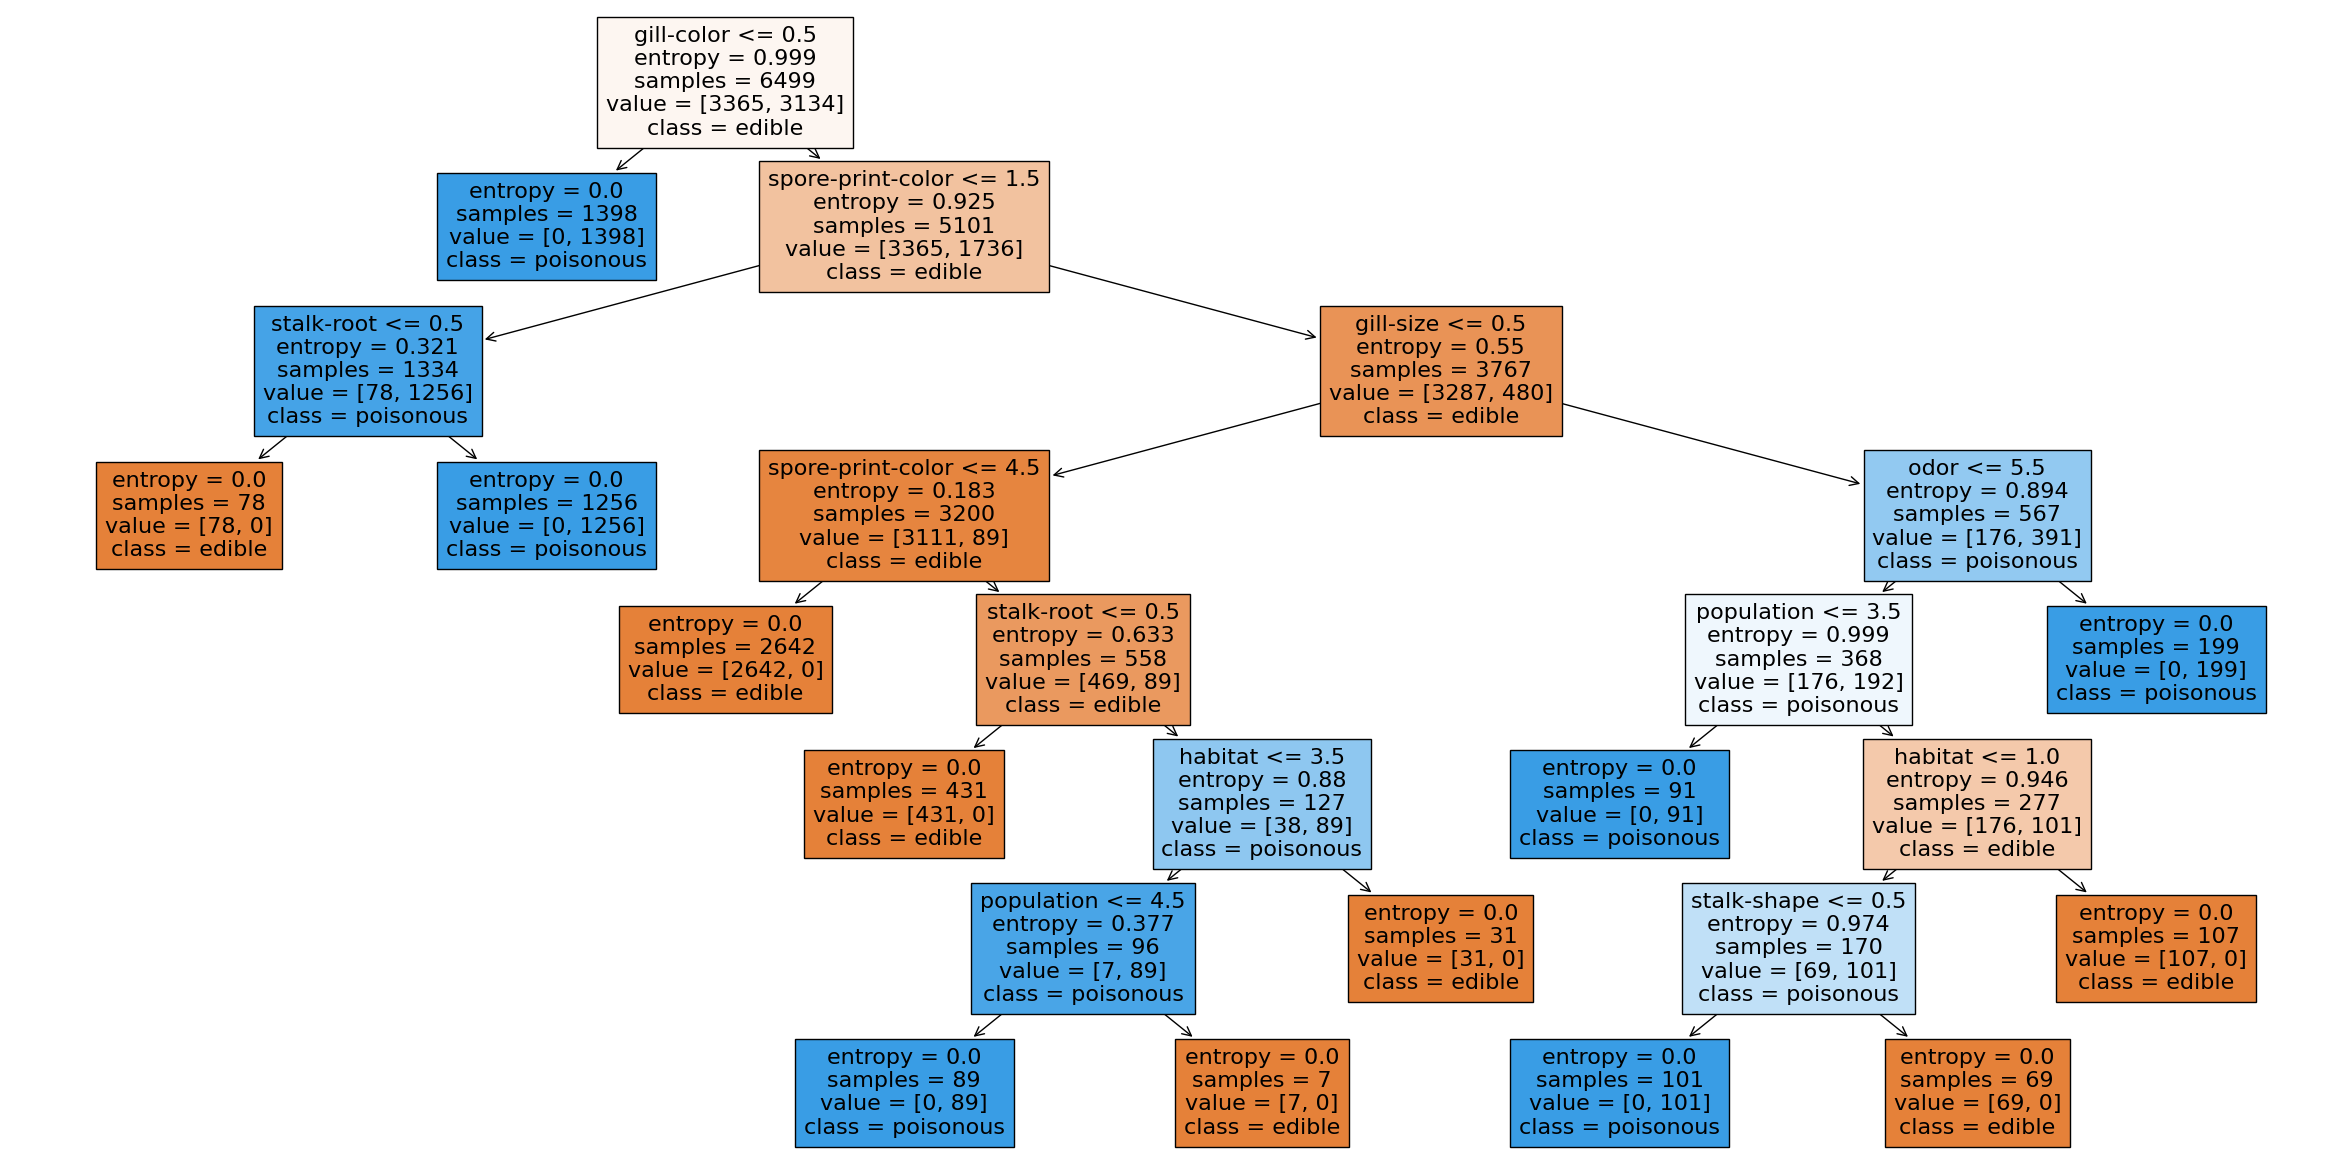

In [ ]:
#create image
plt.figure(figsize=(30, 15))
#create tree and add collumn names
plot_tree(classifier, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)
#show tree
plt.show()

#Evaluation
Lastly, I calculated accuracy  I printed a classification report which includes precision, recall, and F1-score for each class. Then plotted a confusion matrix using seaborn's heatmap function.

Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



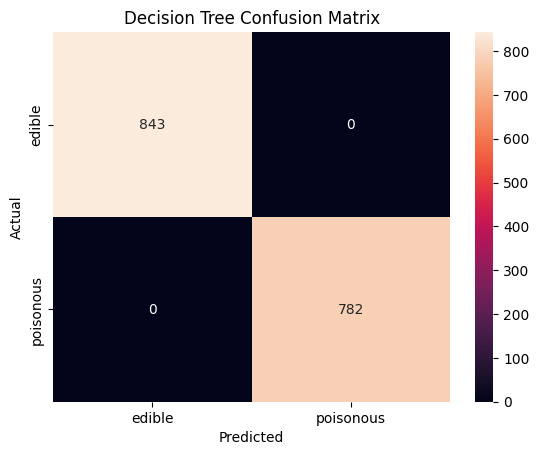

In [ ]:
#calculate and show accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d",xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
#show graph
plt.show()